In [3]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [4]:
# get data from yahoo finance
def get_data(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)
symbol = '002022.SZ'
start = '20050101'
end = '20131231'
data = get_data(symbol, start, end)

In [6]:
def tr(data):
    ''' generate true range TR tech signal'''
    name = 'prev_value'
    data[name] = data.shift(1).Close
    hh = data[['High', name]].max(axis=1)
    ll = data[['Low', name]].min(axis=1)
    del data[name]
    return(hh -ll)

tr(data)
data['TR'] = tr(data)

In [7]:
def ma(data, timespan):
    return pd.rolling_mean(data['Adj Close'], timespan)
short_span = 30
long_span = 100
data['sma'] = ma(data, short_span)
data['lma'] = ma(data, long_span)

In [8]:
data['atr'] = pd.rolling_mean(data['TR'], short_span)
data.tail

<bound method DataFrame.tail of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-01-03  15.63  15.80  15.55  ...     NaN    NaN   NaN
2005-01-04  15.46  15.70  15.31  ...     NaN    NaN   NaN
2005-01-05  15.50  15.88  15.42  ...     NaN    NaN   NaN
2005-01-06  15.65  15.85  15.55  ...     NaN    NaN   NaN
2005-01-07  15.79  15.86  15.50  ...     NaN    NaN   NaN
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.01  15.76  0.42
2013-12-26  16.82  16.82  16.82  ...   16.06  15.75  0.40
2013-12-27  16.82  16.82  16.82  ...   16.10  15.75  0.39
2013-12-30  16.82  16.82  16.82  ...   16.14  15.74  0.37
2013-12-31  16.82  16.82  16.82  ...   16.18  15.73  0.36

[2306 rows x 10 columns]>

In [14]:
data.drop(data[0:long_span].index, inplace = True)
data.head

<bound method DataFrame.head of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-05-23  10.70  10.70  10.26  ...    1.78   1.56  0.51
2005-05-24  10.24  10.76  10.21  ...    1.78   1.56  0.51
2005-05-25  10.65  10.71  10.50  ...    1.77   1.56  0.50
2005-05-26  10.56  10.73  10.35  ...    1.75   1.56  0.47
2005-05-27  10.30  10.52  10.20  ...    1.73   1.56  0.46
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.01  15.76  0.42
2013-12-26  16.82  16.82  16.82  ...   16.06  15.75  0.40
2013-12-27  16.82  16.82  16.82  ...   16.10  15.75  0.39
2013-12-30  16.82  16.82  16.82  ...   16.14  15.74  0.37
2013-12-31  16.82  16.82  16.82  ...   16.18  15.73  0.36

[2206 rows x 10 columns]>

In [15]:
def gen_sig(data):
    data['sig']= 0
    data.loc[data.sma > data.lma, 'sig'] = 1

gen_sig(data)
data.tail(n=20)


             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2013-12-04  16.67  17.09  16.60 ...   15.81  0.48    0
2013-12-05  16.60  16.76  16.36 ...   15.82  0.49    0
2013-12-06  16.50  16.65  16.26 ...   15.82  0.46    0
2013-12-09  16.30  17.06  16.30 ...   15.81  0.47    0
2013-12-10  17.00  17.08  16.75 ...   15.80  0.45    0
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   15.76  0.42    1
2013-12-26  16.82  16.82  16.82 ...   15.75  0.40    1
2013-12-27  16.82  16.82  16.82 ...   15.75  0.39    1
2013-12-30  16.82  16.82  16.82 ...   15.74  0.37    1
2013-12-31  16.82  16.82  16.82 ...   15.73  0.36    1

[20 rows x 11 columns]

In [31]:
entry_days = data[data.sig > data.sig.shift()].index
entry_days

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-07-18, ..., 2013-12-19]
Length: 15, Freq: None, Timezone: None

In [46]:
exit_days = data[data.sig < data.sig.shift()].index
exit_days[1]

i = data.index.get_loc(exit_days[1])
data[i-2 :i + 20]

             Open   High    Low ...    lma   atr  sig
Date                            ...                  
2005-11-22  13.95  14.08  13.67 ...   2.10  0.52    1
2005-11-23  13.65  14.21  13.58 ...   2.10  0.54    1
2005-11-24  14.19  14.19  13.75 ...   2.11  0.56    0
2005-11-25  13.89  14.00  13.68 ...   2.11  0.57    0
2005-11-28  13.75  13.90  13.50 ...   2.12  0.58    0
...           ...    ...    ... ...    ...   ...  ...
2005-12-15  13.28  13.50  13.17 ...   2.16  0.54    0
2005-12-16  13.28  13.40  13.13 ...   2.16  0.52    0
2005-12-19  13.30  13.44  13.10 ...   2.16  0.51    0
2005-12-20  13.18  13.18  12.78 ...   2.17  0.51    0
2005-12-21  12.93  12.97  12.70 ...   2.17  0.49    0

[22 rows x 11 columns]

In [145]:
vkhsw.loc[vkhsw.sig==1]

             Open   High    Low ...     TR   ATR  sig
Date                            ...                  
2010-10-29  17.23  17.40  16.72 ...   0.68  0.69    1
2010-11-01  17.48  17.77  17.30 ...   0.47  0.69    1
2010-11-02  17.60  17.77  17.21 ...   0.56  0.68    1
2010-11-03  17.21  17.32  16.80 ...   0.52  0.67    1
2010-11-04  16.93  17.50  16.91 ...   0.59  0.66    1
...           ...    ...    ... ...    ...   ...  ...
2015-07-23  37.00  38.47  36.57 ...   1.90  3.59    1
2015-07-24  38.19  40.99  37.56 ...   3.43  3.49    1
2015-07-27  38.00  39.24  34.92 ...   4.32  3.47    1
2015-07-28  32.93  34.00  31.43 ...   3.49  3.42    1
2015-07-29  32.69  33.48  29.11 ...   4.37  3.40    1

[702 rows x 13 columns]

In [146]:
vkhsw['ret'] = (vkhsw.sig*vkhsw.change + 1).cumprod()
vkhsw['norm_ret'] = (vkhsw.change +1).cumprod()

# and ax2 is in the lower row



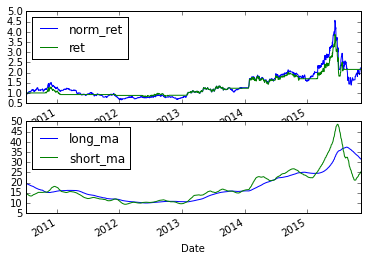

In [147]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)

In [148]:
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

In [149]:
len(trans_count)

7

In [150]:
vkhsw['20111206': '20111208']

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87

[3 rows x 15 columns]

In [151]:
exit_count = vkhsw[vkhsw.sig < vkhsw.shift().sig]
exit_count.count()

Open        7
High        7
Low         7
Close       7
Volume      7
           ..
TR          7
ATR         7
sig         7
ret         7
norm_ret    7
dtype: int64

In [152]:
trans_idx = (trans_count + exit_count).index

In [153]:
max_return = pd.Series([0.0]*len(trans_count))
max_drawdown = max_return.copy()
exit_return = max_drawdown.copy()
max_return

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: float64

In [154]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(trading_days, trans_idx[idx+1])

In [155]:
trade_summary = pd.DataFrame([max_return, max_drawdown, exit_return])
trade_summary

      0     1     2  ...      4     5     6
0  1.27  0.98  1.14  ...   1.49  1.23  2.28
1  0.29  0.07  0.16  ...   0.23  0.20  0.53
2  0.91  0.91  1.02  ...   1.31  1.05  1.17

[3 rows x 7 columns]

In [29]:
last_return = exit_return.cumprod()

In [80]:

def trade_summ( data, at):
    max_ret = np.max(data.ret)
    max_dd = 1 - np.min(data.norm_ret)
    exit_ret = data.ret.loc[at]
    return (max_ret, max_dd, exit_ret)

In [122]:

stoploss = 0.95
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    
    # stop loss filter
    trading_days['stopex'] = 0 
    trading_days.loc[trading_days.ret < stoploss, 'stopex'] = 1
    stop_at = trading_days[trading_days.stopex == 1].index.min()
    print stop_at
    
    # trailing stop filter
    tr_stop = 3 * trading_days.loc[ trans_idx[idx], 'ATR']
    tr_sig = abs(trading_days.Close - trading_days.Close.cumsum()) > tr_stop 
    
    if  not stop_at.year > 0: stop_at = trans_idx[idx+1]
    stop_tds = trading_days[:stop_at].copy()            
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(stop_tds, stop_at)
    


2011-01-17 00:00:00
2011-12-13 00:00:00
2012-05-25 00:00:00
NaT
NaT
NaT
NaT


In [165]:
test = vkhsw['20111206': '20111220'].copy()
# test for trailing stop
test.loc[abs(test.Close - test.Close.cummax())>1, 'sig'] =1 

In [133]:
test['prevClose'] = test.shift(1).Close
test

             Open   High    Low    ...      norm_ret  stopex  prevClose
Date                               ...                                 
2011-12-06  12.30  12.45  12.16    ...          0.87       1        NaN
2011-12-07  12.42  12.75  12.35    ...          0.89       1      12.38
2011-12-08  12.51  12.66  12.16    ...          0.87       1      12.61

[3 rows x 14 columns]

In [135]:
test[['High', 'prevClose']].max(axis=1) - test[['Low', 'prevClose']].min(axis=1)

Date
2011-12-06    0.29
2011-12-07    0.40
2011-12-08    0.50
dtype: float64

In [166]:
test

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87
2011-12-09  12.18  12.42  12.16    ...       1  0.91      0.86
2011-12-12  12.23  12.39  12.20    ...       1  0.91      0.86
...           ...    ...    ...    ...     ...   ...       ...
2011-12-14  11.90  12.05  11.77    ...       1  0.88      0.83
2011-12-15  11.73  11.88  11.11    ...       1  0.88      0.81
2011-12-16  11.44  11.68  11.15    ...       0  0.88      0.82
2011-12-19  11.48  11.62  11.19    ...       1  0.88      0.81
2011-12-20  11.58  11.88  11.50    ...       0  0.88      0.82

[11 rows x 15 columns]